# NLP Disaster Tweets
     The dataset contains a collection of tweets about disaster, labelled with 1 if it relates to disaster and 0 if it's not.
     
         After looking more into the data it seems that the 3 files we have is a splitting product. So, i'll merge all those 3 files to a single DataFrame and proceed to do the NLP process with the DataFrame.
    
    Since the label in "related" column has 3 labels, i'll drop one of the label (2) which is not related to our NLP model since mostly it's a noise tweets data.

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [2]:
train = pd.read_csv('disaster_response_messages_training.csv')
val = pd.read_csv('disaster_response_messages_validation.csv')
test = pd.read_csv('disaster_response_messages_test.csv')

C:\Users\OSVALDO\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df = pd.concat([train,val,test])
df = df.sort_values(by=['id'], ascending=True)
df.head()

,id,split,message,original,genre,related,PII,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,water,food,shelter,clothing,money,missing_people,refugees,death,other_aid,infrastructure_related,transport,buildings,electricity,tools,hospitals,shops,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,train,Weather update - a cold front from Cuba that could pass over Haiti,Un front froid se retrouve sur Cuba ce matin. Il pourrait traverser Haiti demain. Des averses de pluie isolee sont encore prevues sur notre region ce soi,direct,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7,train,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
0,8,validation,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ak timoun yo. Mesi se john jean depi Monben kwochi.",direct,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,9,test,UN reports Leogane 80-90 destroyed. Only Hospital St. Croix functioning. Needs supplies desperately.,UN reports Leogane 80-90 destroyed. Only Hospital St. Croix functioning. Needs supplies desperately.,direct,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,12,train,"says: west side of Haiti, rest of the country today and tonight",facade ouest d Haiti et le reste du pays aujourd hui et ce soir,direct,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
# dropping the "2" labels in "related" column
df = df[df['related'] != 2]
df['related'].unique()

array([1, 0], dtype=int64)

In [5]:
# dropping the "original", "id", and "split" column since we won't use the information from these column
df.drop(['original','id','split'], axis=1, inplace=True)

In [6]:
df.head()

,message,genre,related,PII,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,water,food,shelter,clothing,money,missing_people,refugees,death,other_aid,infrastructure_related,transport,buildings,electricity,tools,hospitals,shops,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,Weather update - a cold front from Cuba that could pass over Haiti,direct,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Is the Hurricane over or is it not over,direct,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
0,Looking for someone but no name,direct,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,UN reports Leogane 80-90 destroyed. Only Hospital St. Croix functioning. Needs supplies desperately.,direct,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,"says: west side of Haiti, rest of the country today and tonight",direct,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Generating Word Frequency

In [7]:
# Importing library
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# First, we're going to convert tweets to lowercase to maintain consistency
for i in range(len(train['message'])):
    train['message'][i] = train['message'][i].lower()

<ipython-input-7-6d7f2bbc5270>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['message'][i] = train['message'][i].lower()


In [8]:
def gen_freq(text):
    #menyimpan list kata
    word_list = []

    #loop semua tweets dan menekstrak kata-kata ke word_list
    for tw_words in text.split():
        word_list.extend(tw_words)

    #melihat frekuensi kata-kata
    word_freq = pd.Series(word_list).value_counts()

    #melihat 20 kata teratas
    word_freq[:20]
    
    return word_freq

#applying the function
text_freq = gen_freq(df['message'].str)
text_freq.head(50)

the       28759
and       18253
to        17190
of        16746
in        14703
a          8936
for        6242
I          5895
is         5312
have       4722
are        4696
on         3833
that       3824
The        3547
with       3327
by         2942
we         2740
from       2705
as         2665
has        2378
you        2377
people     2346
at         2338
water      2055
will       2021
be         1985
need       1886
can        1873
help       1858
this       1796
food       1791
not        1785
We         1714
been       1703
an         1615
was        1582
it         1482
were       1471
like       1436
would      1432
my         1391
me         1350
which      1328
-          1293
or         1235
they       1229
their      1226
some       1181
more       1175
i          1172
dtype: int64

Most of the highest tweets are a constructs of the english language (the, to, for, etc.)(stop words) and aren't specific to the people's tweets.

### Word Cleaning
- Stop Words
- Delete Punctuation
- Lemmatization

In [9]:
# Importing library
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer # not gonna use stemming
from nltk.stem import WordNetLemmatizer

stop_words = stopwords.words('english')
stemmer = PorterStemmer()
lem = WordNetLemmatizer()

In [10]:
cleaned_tweets_lem = []

for i in range(len(df['message'])):
    tweet = re.sub('[^a-zA-Z]',' ',df['message'].iloc[i]) #replace whatever character which is not in a-z
    tweet = tweet.lower().split() #splitting the words and lowercase(justincase)
    tweet = [lem.lemmatize(word, pos='v') for word in tweet if (word not in stop_words)] #lemmatize words that's not a stop word
    tweet = ' '.join(tweet) #rejoin the words to get sentences
    cleaned_tweets_lem.append(tweet)
    
cleaned_tweets_lem

['weather update cold front cuba could pass haiti',
 'hurricane',
 'look someone name',
 'un report leogane destroy hospital st croix function need supply desperately',
 'say west side haiti rest country today tonight',
 'information national palace',
 'storm sacred heart jesus',
 'please need tent water silo thank',
 'would like receive message thank',
 'croix des bouquets health issue workers santo area croix des bouquets',
 'nothing eat water starve thirsty',
 'petionville need information regard',
 'thomassin number area name pyron would like water thank god fine desperately need water thank',
 'let together need food delma didine area',
 'information number order participate see use',
 'comitee delmas rue street janvier impasse charite people temporary shelter dire need water food medications tent clothe please stop see us',
 'need food water klecin die hunger impasse chretien klecin extend extension hungry sick',
 'go call want call ou let know',
 'understand use thing',
 'would 

In [11]:
# Looking at the most frequent words in cleaned data
text_freq = gen_freq(pd.DataFrame(cleaned_tweets_lem)[0].str)
len(text_freq)

28393

### TF-IDF

In [12]:
# Importing library
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf = TfidfVectorizer(max_features=10000)
# applying TF-IDF
x_words = tf_idf.fit_transform(cleaned_tweets_lem).toarray()
x_words.shape

(26055, 10000)

### x,y split

In [13]:
# Dropping the "message" column and encoding the "genre" column
df.drop(['message','genre'], axis=1, inplace=True)
# Encoding the object variable
for i in df.select_dtypes(include='object'):
    df[i] = df[i].astype('category').cat.codes

df.head(10)

,related,PII,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,water,food,shelter,clothing,money,missing_people,refugees,death,other_aid,infrastructure_related,transport,buildings,electricity,tools,hospitals,shops,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
5,1,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [14]:
# First we're going to combine the x_words and the features we have from the data
# importing library to split the data
from sklearn.model_selection import train_test_split
#s splitting the data
x_ori = df.drop(columns="related")
y = df["related"]

x_ori.shape, y.shape

((26055, 36), (26055,))

In [15]:
import numpy as np
# combining the two x
x = np.concatenate((x_ori, x_words), axis=1)
x.shape, y.shape

((26055, 10036), (26055,))

### Target Variable Proportion

<AxesSubplot:ylabel='related'>

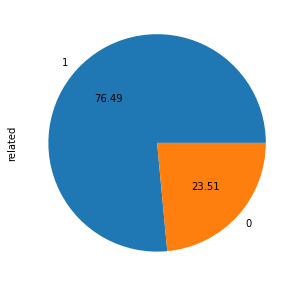

In [16]:
plt.figure(figsize=(10,5))
y.value_counts().plot.pie(autopct='%.2f')

So, we hava an imbalance target variable, thus i'm going to use random oversampling to handle the imbalance data

In [17]:
# Importing package
from imblearn.over_sampling import RandomOverSampler
# Oversampling method
ros = RandomOverSampler(sampling_strategy="not majority")
x_words,y = ros.fit_resample(x_words,y)

<AxesSubplot:ylabel='related'>

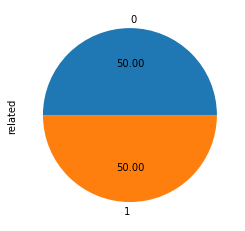

In [18]:
# look at the new proportion
y.value_counts().plot.pie(autopct='%.2f')

# Modeling
I'll use Logistic Regression and Naive Bayes models for this NLP modeling project.
1. Logistic Regression is the most commonly (basic) used algorithms for classification problems and powerful since our features are mostly categorical.
2. Naive Bayes are mostly used in natural language processing (NLP) problems. Naive Bayes predict the tag of a text. They calculate the probability of each tag for a given text and then output the tag with the highest one. "https://www.geeksforgeeks.org/applying-multinomial-naive-bayes-to-nlp-problems/#:~:text=Naive%20Bayes%20are%20mostly%20used,tag%20with%20the%20highest%20one."

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score,precision_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x_words,y,stratify=y,test_size=.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((31888, 10000), (7972, 10000), (31888,), (7972,))

### Logistic Regression

In [21]:
%%time
lr = LogisticRegression(random_state=42)
lr.fit(x_train,y_train)
y_lr_train = lr.predict(x_train)
y_lr_test = lr.predict(x_test)
acc_lr_train = accuracy_score(y_train,y_lr_train)
acc_lr_test = accuracy_score(y_test,y_lr_test)
f1_lr_train = f1_score(y_train,y_lr_train,average="macro")
f1_lr_test = f1_score(y_test,y_lr_test,average="macro")

status_lr = []

C:\Users\OSVALDO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Wall time: 48.1 s


In [22]:
print(f"Nilai Akurasi Logistic Regression : \n train : {acc_lr_train} \n test : {acc_lr_test} ")
if (acc_lr_train-acc_lr_test) > 0.1 :
    print("Overfitting")
    status_lr.append("Overfitting")
elif (acc_lr_train-acc_lr_test) < -0.1 :
    print("UnderFitting") 
    status_lr.append("Underfitting")
else :
    print("Just Right")
    status_lr.append("Just Right")
###########################################################################################################
print(f"\n Nilai F1 Score Logistic Regression : \n train : {f1_lr_train} \n test : {f1_lr_test} ")
if (f1_lr_train-f1_lr_test) > 0.1 :
    print("Overfitting")
    status_lr.append("Overfitting")
elif (f1_lr_train-f1_lr_test) < -0.1 :
    print("UnderFitting") 
    status_lr.append("Underfitting")
else :
    print("Just Right")
    status_lr.append("Just Right")

Nilai Akurasi Logistic Regression : 
 train : 0.886352232814852 
 test : 0.8454591068740592 
Just Right

 Nilai F1 Score Logistic Regression : 
 train : 0.8862542313912488 
 test : 0.8452599477417935 
Just Right


In [23]:
# See the report
from sklearn.metrics import classification_report
cf_lr = classification_report(y_test,y_lr_test)
print(cf_lr)

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      3986
           1       0.87      0.81      0.84      3986

    accuracy                           0.85      7972
   macro avg       0.85      0.85      0.85      7972
weighted avg       0.85      0.85      0.85      7972



### Naive Bayes

In [24]:
%%time
nb = MultinomialNB()
nb.fit(x_train,y_train)
y_nb_train = nb.predict(x_train)
y_nb_test = nb.predict(x_test)
acc_nb_train = accuracy_score(y_train,y_nb_train)
acc_nb_test = accuracy_score(y_test,y_nb_test)
f1_nb_train = f1_score(y_train,y_nb_train,average="macro")
f1_nb_test = f1_score(y_test,y_nb_test,average="macro")

status_nb = []

Wall time: 1.85 s


In [25]:
print(f"Nilai Akurasi Naive Bayes : \n train : {acc_nb_train} \n test : {acc_nb_test} ")
if (acc_nb_train-acc_nb_test) > 0.1 :
    print("Overfitting")
    status_nb.append("Overfitting")
elif (acc_nb_train-acc_nb_test) < -0.1 :
    print("UnderFitting") 
    status_nb.append("Underfitting")
else :
    print("Just Right")
    status_nb.append("Just Right")
###########################################################################################################
print(f"\n Nilai F1 Score Naive Bayes : \n train : {f1_nb_train} \n test : {f1_nb_test} ")
if (f1_nb_train-f1_nb_test) > 0.1 :
    print("Overfitting")
    status_nb.append("Overfitting")
elif (f1_nb_train-f1_nb_test) < -0.1 :
    print("UnderFitting") 
    status_nb.append("Underfitting")
else :
    print("Just Right")
    status_nb.append("Just Right")

Nilai Akurasi Naive Bayes : 
 train : 0.8496299548419468 
 test : 0.8173607626693427 
Just Right

 Nilai F1 Score Naive Bayes : 
 train : 0.8496197254973843 
 test : 0.8173570381231672 
Just Right


In [26]:
# See the report
from sklearn.metrics import classification_report
cf_nb = classification_report(y_test,y_nb_test)
print(cf_nb)

              precision    recall  f1-score   support

           0       0.81      0.82      0.82      3986
           1       0.82      0.81      0.82      3986

    accuracy                           0.82      7972
   macro avg       0.82      0.82      0.82      7972
weighted avg       0.82      0.82      0.82      7972



### Confusion Matrix

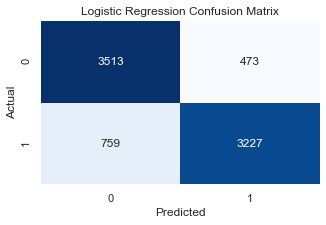

In [27]:
import seaborn as sns
sns.set(style='darkgrid')
cm_lr = confusion_matrix(y_test,y_lr_test)

plt.figure(figsize = (5, 3))
sns.heatmap(cm_lr, annot = True, fmt = 'g', cmap = 'Blues', cbar = False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

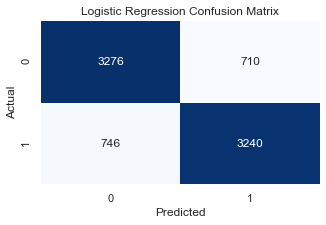

In [28]:
cm_nb = confusion_matrix(y_test,y_nb_test)

plt.figure(figsize = (5, 3))
sns.heatmap(cm_nb, annot = True, fmt = 'g', cmap = 'Blues', cbar = False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

In [29]:
temp_sentence = ["daniel best data science ever hurricane storm help"]
len(tf_idf.transform(temp_sentence).toarray()[0])
lr.predict(tf_idf.transform(temp_sentence).toarray())

array([1], dtype=int64)